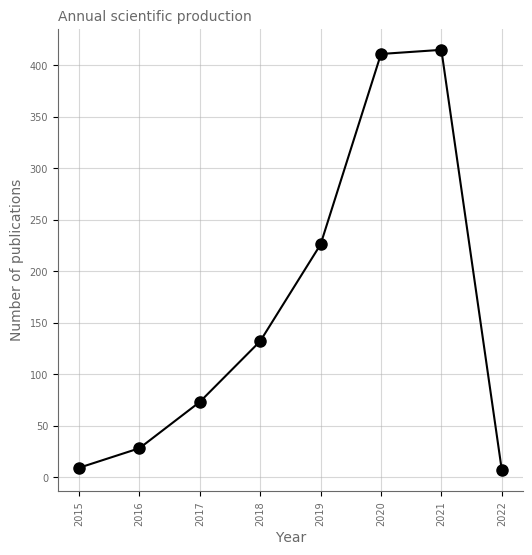

In [1]:
import os, sys
import pandas as pd
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
pd.set_option("display.notebook_repr_html", False)

from techminer import *

directory = "/workspaces/techminer-api/tests/data/"


annual_scientific_production().savefig("/workspaces/techminer-api/sphinx/images/annual_scientific_production.png")



In [3]:
# column_coverage(directory, column="author_keywords")
print(summary_view())

2021-11-16 15:37:46 - INFO - *
2021-11-16 15:37:46 - INFO - *  Argument `directory` is **None**. 
2021-11-16 15:37:46 - INFO - *  Loading data from DEBUG directory /workspaces/techminer-api/tests/data/
2021-11-16 15:37:46 - INFO - *
                                                             value
Category       Item                                               
GENERAL        Documents:                                     1301
               Years:                                    2015-2022
               Compound annual growth rate:                86.21 %
               Average citations per document:                5.40
               Average citations per document per year:       0.67
               Total references:                             57797
               Average global references per document:          44
DOCUMENT TYPES article:                                        780
               book:                                            19
               book_chapter:  

In [ ]:
# user_filters(directory, erratum=False,  letter=False, first_year=2016, last_year=2020)
# user_filters(directory)
# annual_indicators()
# annual_scientific_production().plot()
# annual_scientific_production().table_
# apply_thesaurus(directory, thesaurus_file="keywords.txt", input_column="author_keywords", output_column="author_keywords_thesaurus", strict=False)
# auto_corr_heat_map(auto_corr_matrix(directory, column='authors', min_occ=4), cmap='Reds').savefig("/workspaces/techminer-api/sphinx/images/auto_corr_heat_map.png")
# auto_corr_map(auto_corr_matrix(directory, column='author_keywords', min_occ=20)).savefig('/workspaces/techminer-api/sphinx/images/auto_corr_map.png')
# auto_corr_map(auto_corr_matrix(directory, column='authors', min_occ=4), num_terms=10)
# auto_corr_matrix(directory, column='author_keywords', min_occ=18)
# auto_corr_matrix(directory, column='authors', min_occ=4)
# auto_corr_matrix(directory, column='authors', min_occ=6)
# bar_chart(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/bar_chart.png")
# bradford_plot()
# bubble_chart(co_occurrence_matrix(directory, column='authors', min_occ=5))
# build_similarity_matrix_from_clusters(coc_matrix, clusters)
# clean_institutions(directory)
# clean_keywords(directory)
# clusters = similarity_matrix_clustering(coc_matrix)
# co_citation_network(directory, min_edges=4).plot( k=0.4, iterations=400).savefig('/workspaces/techminer-api/sphinx/images/co_citation_network.png')
# co_occurrence_heat_map(co_occurrence_matrix(directory, column='authors', min_occ=5), cmap='Reds').savefig("/workspaces/techminer-api/sphinx/images/co_occurrence_heat_map.png")
# co_occurrence_matrix(directory, 'authors', by='countries', min_occ=5, min_occ_by=8)
# co_occurrence_matrix(directory, 'authors', min_occ=5)
# co_occurrence_matrix(directory, column='authors', min_occ=5)
# co_occurrence_network_clusters(co_occurrence_matrix(directory, column='authors', min_occ=5))
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').heat_map()
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').heat_map().savefig('/workspaces/techminer-api/sphinx/images/co_occurrence_heat_map.png')
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').node_degrees()
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').node_degrees().savefig('/workspaces/techminer-api/sphinx/images/co_occurrence_degrees.png')
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').plot()
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').plot().savefig('/workspaces/techminer-api/sphinx/images/co_occurrence_network.png')
# co_occurrence_network(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), 'louvain').table().head()
# co_word_association_mds_map(co_occurrence_matrix(directory, 'author_keywords', min_occ=15)).savefig('/workspaces/techminer-api/sphinx/images/co_word_association_mds_map.png')
# coc_matrix = co_occurrence_matrix(directory, column='authors', min_occ=5, association='jaccard')
# concept_mapping(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map().savefig("/workspaces/techminer-api/sphinx/images/concept_mapping.png")
# collaboration_indicators(directory, "countries").head()
# column_chart(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/column_chart.png")
# column_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# column_indicators()
# core_sources(directory)
# count_documents_by_term(directory, column='authors', min_occ=6)
# coverage()
# create_thesaurus(directory, column="keywords", thesaurus_file="test_thesaurus.txt", sep="; ")
# cross_corr_matrix(directory, column='authors', by='author_keywords', min_occ=5)
# cross_corr_matrix(directory, column='authors', min_occ=5, by='countries', min_occ_by=6)
# factor_cluster_map(centers, members)
# factor_heat_map(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6))).savefig("/workspaces/techminer-api/sphinx/images/factor_heat_map.png")
# factor_matrix(co_occurrence_matrix(directory, 'authors', min_occ=5))
# factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6))
# factor_members_map(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6)), members)
# heat_map(co_occurrence_matrix(directory, 'authors', by='countries', min_occ=5, min_occ_by=8), cmap='Blues')
# heat_map(co_occurrence_matrix(directory, 'authors', by='countries', min_occ=5, min_occ_by=8), cmap='Blues').savefig("/workspaces/techminer-api/sphinx/images/co_occurrence_heat_map.png")
# heat_map(terms_per_year_analysis(directory, column='authors', metric='num_documents', min_occ=5), cmap='Reds')
# impact_analysis(directory, column="authors")
# impact_indicators(directory, "countries").head()
# import_scopus_file()
# lotka_plot()
# mainfold_factorial_analysis(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), mainfold_method=MDS(), clustering_method=KMeans(n_clusters=4)).map()
# mainfold_factorial_analysis(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), mainfold_method=MDS(), clustering_method=KMeans(n_clusters=4)).silhouette_scores_plot()
# mainfold_factorial_analysis(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), mainfold_method=MDS(), clustering_method=KMeans(n_clusters=4)).words_by_cluster().head()
# mean_global_citations().plot().savefig('/workspaces/techminer-api/sphinx/images/mean_global_citations.png')
# mean_global_citations().table_
# members, centers = factor_clusters(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6)))
# most_relevant_sources().plot()
# most_relevant_sources().plot().savefig('/workspaces/techminer-api/sphinx/images/most_relevant_sources.png')
# most_relevant_sources().table_.head()
# pie_chart(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/pie_chart.png")
# pie_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# similarity_matrix_bubble_map(coc_matrix, clusters)
# slope_chart(co_occurrence_matrix(directory, column='authors', min_occ=5))
# summary()
# svd_co_occurrence_matrix_map(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), dim_y=1).savefig('/workspaces/techminer-api/sphinx/images/svd_co_occurrence_matrix_map.png')
# svd_tf_idf_matrix_map(tf_idf_matrix(directory, 'author_keywords', min_occ=15)).savefig('/workspaces/techminer-api/sphinx/images/svd_tf_idf_matrix_map.png')
# terms_analysis(directory, column='authors', min_occ=5)
# terms_per_year_analysis(directory, column='authors', metric='num_documents', min_occ=5)
# tf_idf_matrix_mds_map(tf_idf_matrix(directory, 'author_keywords', min_occ=15)).savefig('/workspaces/techminer-api/sphinx/images/tf_idf_matrix_mds_map.png')
# thematic_map(directory, 'author_keywords', min_occ=13).map()
# time_analysis(directory)
# top_documents(directory)
# top_documents(directory)
# tree_map(series=annual_indicators(directory)['num_documents'], darkness=annual_indicators(directory)['global_citations']).savefig("/workspaces/techminer-api/sphinx/images/tree_map.png")
# tree_map(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')
# word_cloud(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')
# word_cloud(terms_report(directory, 'authors', min_occ=5).num_documents)
# world_map(directory, figsize=(8,7)).savefig('/workspaces/techminer-api/sphinx/images/world_map.png')
## ca_factorial_analysis(tf_matrix(directory, 'author_keywords', min_occ=14), clustering_method=KMeans(n_clusters=4)).silhouette_scores_plot()
# concept_mapping(co_occurrence_matrix(directory, 'author_keywords', min_occ=15), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map().savefig("/workspaces/techminer-api/sphinx/images/concept_mapping_map.png")
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).decomposed_themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map().savefig("/workspaces/techminer-api/sphinx/images/thematic_analysis-map.png")

# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).decomposed_themes_by_words_
# thematic_analysis(tf_idf_matrix(directory, 'author_keywords', min_occ=13), clustering_method=KMeans(n_clusters=6), manifold_method=MDS()).map()

---

In [ ]:
import pandas as pd

# pd.read_csv("/workspaces/techminer-api/tests/data/documents.csv").author_keywords.head()
pd.read_csv("/workspaces/techminer-api/tests/data/documents.csv")[['local_references', 'document_id']]

In [ ]:
pd.read_csv("/workspaces/techminer-api/tests/data/documents.csv").columns